In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 
# seaborn 의 font_scale 을 사용하면 편합니다.

import missingno as msno

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

- **데이터셋 확인** 
 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 
 - 하지만 가끔 null data가 존재합니다. 
 - 이를 확인하고, 향후 수정합니다.


- **탐색적 데이터 분석(exploratory data analysis)** 
 - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 
 - 여러 시각화 툴을 사용하여 insight를 얻습니다.
 
 
- **feature engineering** 
 - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. 
 - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
 
 
- **model 만들기** 
 - sklearn 을 사용해 모델을 만듭니다. 
 - 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 
 - 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
 
 
- **모델 학습 및 예측** 
 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.


- **모델 평가** 
 - 예측 성능이 원하는 수준인지 판단합니다. 
 - 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 
 - 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

# 1. Dataset 확인

- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
- 우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
- 캐글에서 데이터셋은 보통 train, testset 으로 나뉘어 있습니다.

In [24]:
df_train = pd.read_csv('Titanic_data/train.csv')
df_test = pd.read_csv('Titanic_data/test.csv')

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.  

|변수(feature, variable)   |정의    |설명   |타입   
| - | :----: | :----: | :---- |
|survival|생존여부|target label 임. 1, 0 으로 표현됨 |	integer|
|Pclass|티켓의 클래스|	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|	integer|
|sex|성별|	male, female 로 구분되며 binary	|string|
|Age|나이|	continuous	|integer|
|sibSp|함께 탑승한 형제와 배우자의 수|	quantitative	|integer|
|parch|함께 탑승한 부모, 아이의 수|	quantitative	|integer|
|ticket|티켓 번호|	alphabat + integer	|string|
|fare|탑승료|	continuous	|float|
|cabin|객실 번호|	alphabat + integer	|string|
|embared|탑승 항구|	C = Cherbourg, Q = Queenstown, S = Southampton	|string|

- pandas dataframe 에는 describe() 메소드가 있는 데, 이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.

In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피, PassenserID 숫자와 다른, 그러니까 null data가 존재하는 열(feature)가 있는 것 같습니다.
- 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다

## 1.1 Null data check 

In [60]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [63]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.
- MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

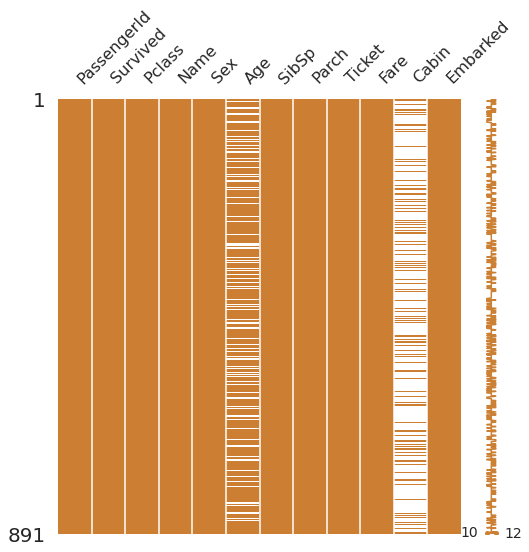

In [64]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

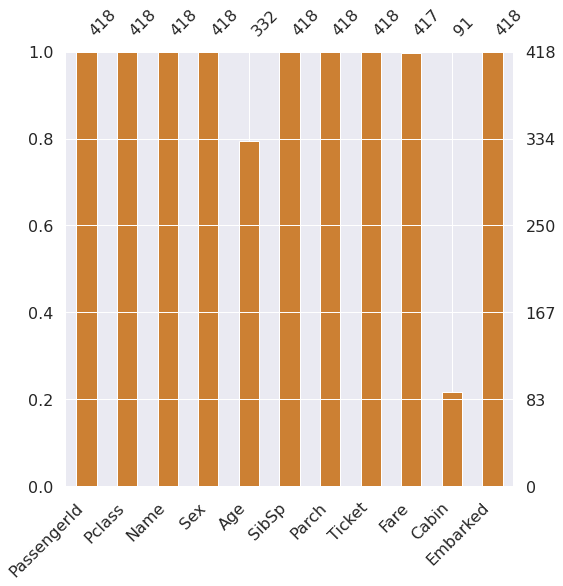

In [66]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

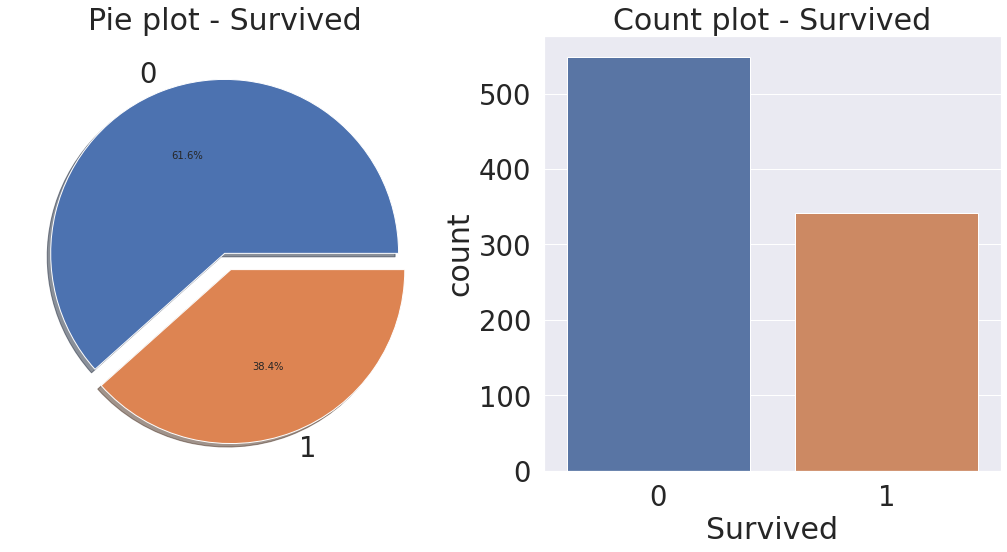

In [73]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 안타깝게도 죽은 사람이 많습니다.
- 38.4 % 가 살아남았습니다.
- target label 의 분포가 제법 균일(balanced)합니다.   
불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다.   
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 
지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

# 2. Exploratory data analysis

- 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다.   
이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다.   
특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

## 2.1 Pclass

- 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다.   
카테고리이면서, 순서가 있는 데이터 타입입니다.
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,  
pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,  
이를 평균내면 각 pclass 별 생존률이 나옵니다
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면,   
216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [77]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [79]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있습니다.

In [80]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다. class 1 이면 아래와 같습니다.

$$ {80 \over (80 + 136)} \thickapprox 0.63 $$

<AxesSubplot:xlabel='Pclass'>

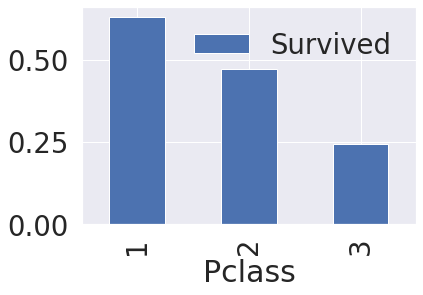

In [86]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보다시피, Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.
- 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있습니다.

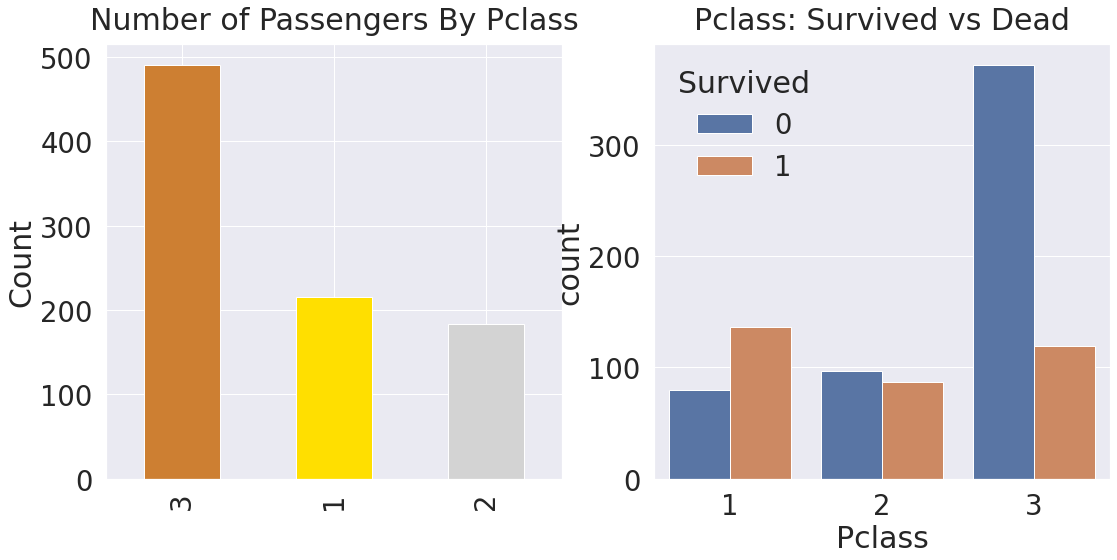

In [89]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])

ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다.  
Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다
- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며,   
나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.